<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data

## Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the [**Blood Transfusion Service Center Data Set**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) in Hsin-Chu City in Taiwan.
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.
        e-mail:icyeh 'at' chu.edu.tw
        Tel: 886-3-5186511
        Date Donated: October 3, 2008 

- Citation Request:
- **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
    model using Bernoulli sequence, "Expert Systems with Applications, 2008 
    (doi:10.1016/j.eswa.2008.07.018).

In [59]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import math
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
tf = pd.read_csv('../DATA/transfusion.data')

In [7]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [ ]:
# Import libraries

In [8]:
# Read data in pandas

# Check data has loaded correctly
tf.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [ ]:
# Perform EDA by investigating each of the points above 

In [10]:
tf.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [17]:
tf.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [25]:
tf.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [30]:
def change_name(col):
    col = col.replace('(','')
    col = col.replace(')','')
    col = col.replace(' ','_')
    col = col.lower()
    return col

tf.rename(mapper= change_name, axis=1, inplace=True)

In [31]:
tf.head()

,recency_months,frequency_times,monetary_c.c._blood,time_months,whether_he/she_donated_blood_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [32]:
tf.columns

Index(['recency_months', 'frequency_times', 'monetary_c.c._blood',
       'time_months', 'whether_he/she_donated_blood_in_march_2007'],
      dtype='object')

<AxesSubplot:xlabel='recency_months', ylabel='count'>

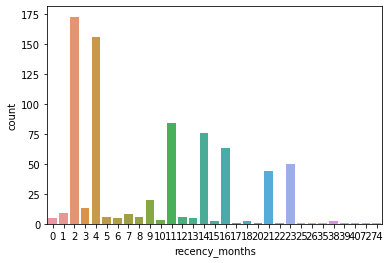

In [33]:
sns.countplot(x='recency_months', data = tf)

(array([375., 200., 114.,  52.,   1.,   4.,   0.,   0.,   0.,   2.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <BarContainer object of 10 artists>)

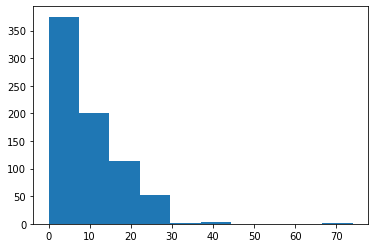

In [34]:
plt.hist('recency_months',data=tf)

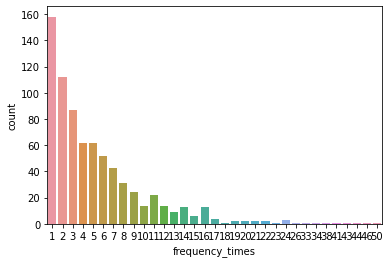

In [35]:
sns.countplot(x='frequency_times', data = tf);

(array([481., 164.,  64.,  22.,   8.,   1.,   2.,   1.,   3.,   2.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

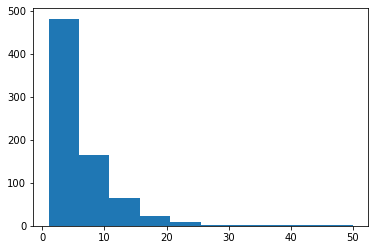

In [36]:
plt.hist('frequency_times',data=tf)

(array([481., 164.,  64.,  22.,   8.,   1.,   2.,   1.,   3.,   2.]),
 array([  250.,  1475.,  2700.,  3925.,  5150.,  6375.,  7600.,  8825.,
        10050., 11275., 12500.]),
 <BarContainer object of 10 artists>)

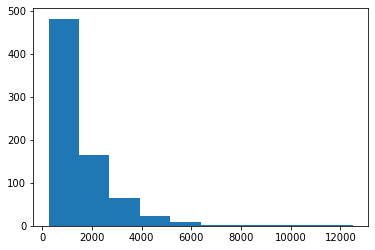

In [37]:
plt.hist('monetary_c.c._blood',data=tf)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

In [38]:
tf.shape

(748, 5)

In [40]:
tf.loc[tf['recency_months']>50,:]

,recency_months,frequency_times,monetary_c.c._blood,time_months,whether_he/she_donated_blood_in_march_2007
499,74,1,250,74,0
747,72,1,250,72,0


In [43]:
tf.loc[(tf['frequency_times']>30)&(tf['monetary_c.c._blood']>10000),:]

,recency_months,frequency_times,monetary_c.c._blood,time_months,whether_he/she_donated_blood_in_march_2007
0,2,50,12500,98,1
9,5,46,11500,98,1
500,2,43,10750,86,1
503,2,44,11000,98,0
505,2,41,10250,98,1


In [45]:
tf.columns

Index(['recency_months', 'frequency_times', 'monetary_c.c._blood',
       'time_months', 'whether_he/she_donated_blood_in_march_2007'],
      dtype='object')

In [46]:
tf['whether_he/she_donated_blood_in_march_2007'].value_counts()

0    570
1    178
Name: whether_he/she_donated_blood_in_march_2007, dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [47]:
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [51]:
# Split your data
feat = tf.columns[:-1]
X = tf[feat]
y = tf['whether_he/she_donated_blood_in_march_2007']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [54]:
# Define ML model(s)
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

# Step 9: Fit the Model

In [55]:
# Fit model
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.6898395721925134

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [57]:
# Evaluate model against training set
tree.score(X_train,y_train)

0.910873440285205

In [56]:
# Evaluate model against test set
tree.score(X_test,y_test)

0.6898395721925134

In [60]:
x.head(1)

,recency_months,frequency_times,monetary_c.c._blood,time_months
0,2,50,12500,98


In [58]:
tree.feature_importances_

array([0.33269241, 0.11465257, 0.15524663, 0.39740839])

In [61]:
tf.columns

Index(['recency_months', 'frequency_times', 'monetary_c.c._blood',
       'time_months', 'whether_he/she_donated_blood_in_march_2007'],
      dtype='object')

In [62]:
tf['whether_he/she_donated_blood_in_march_2007'].value_counts()

0    570
1    178
Name: whether_he/she_donated_blood_in_march_2007, dtype: int64

In [109]:
params = {
    "max_depth":range(1,50),
    "criterion": ["gini","entropy"],
    "class_weight": [None,'balanced']
}

In [110]:
gs_tree = DecisionTreeClassifier()

In [111]:
gs = GridSearchCV(estimator=tree,
                 param_grid=params)

In [112]:
gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50)})

In [113]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [77]:
gs.fit(X_train,y_train)

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 208, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_s

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.70044248 0.69513274
 0.70406131 0.70406131 0.70406131 0.70224399 0.70584703 0.70406131
 0.70584703 0.70584703]
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'class_weight': ['None', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30]})

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [82]:
best_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)

In [114]:
best_tree = DecisionTreeClassifier(max_depth=3)

In [115]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [116]:
best_tree.score(X_test, y_test)

0.7754010695187166

In [117]:
from sklearn import metrics

In [118]:
y_pred = best_tree.predict(X_test)

In [119]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.7754010695187166
Precision: 0.625
Recall: 0.3125


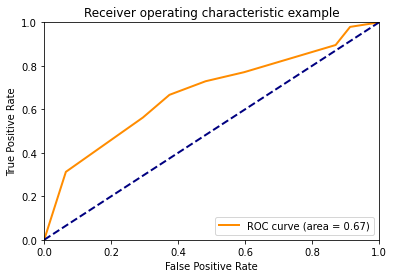

In [120]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = best_tree.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 12: Feature Importance

In [121]:
best_tree.feature_importances_

array([0.53940534, 0.20501357, 0.        , 0.25558109])

In [125]:
for name,score in zip(x.columns,best_tree.feature_importances_):
    print(f'{name}:{score}')

recency_months:0.5394053413450675
frequency_times:0.20501357341102394
monetary_c.c._blood:0.0
time_months:0.2555810852439085


Text(0.5, 0, 'Relative Importance')

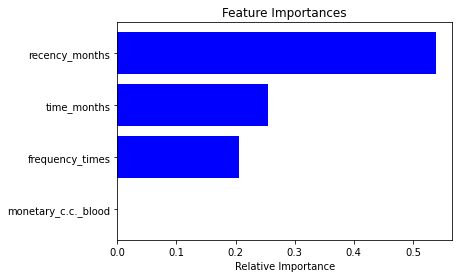

In [131]:
features=X[feat].columns
importances = best_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')

# Step 13: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

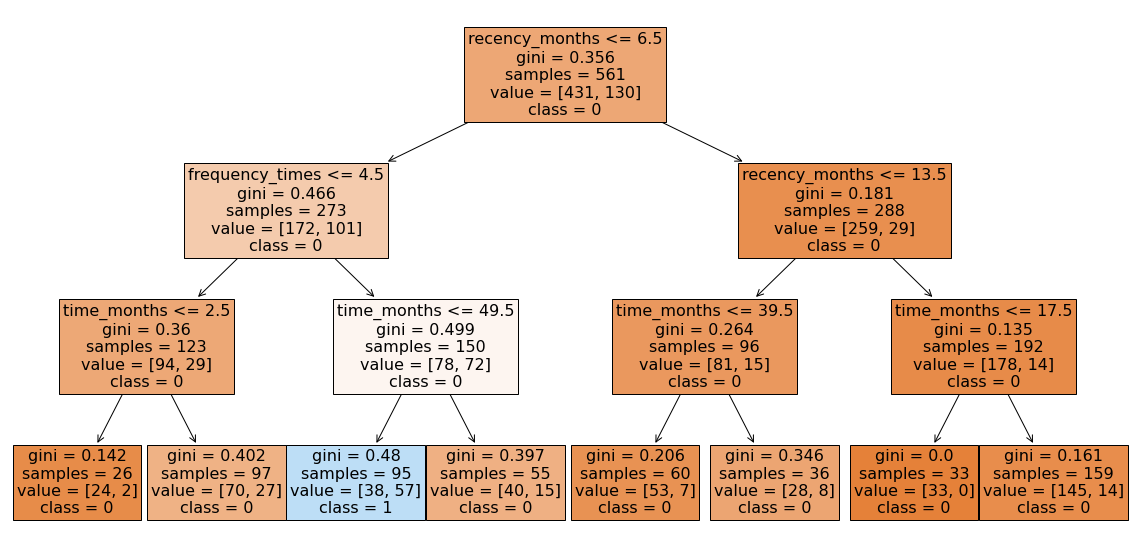

In [130]:
from sklearn import tree
plt.figure(figsize = (20,10))
tree.plot_tree(best_tree, 
               feature_names=X[feat].columns,
               class_names=['0','1'],
               filled = True,
              fontsize=16);

# Step 14: Visualise the Decision Tree